In [51]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit, brentq, fsolve
from scipy.interpolate import interp1d

import numpy as np
import sympy as sp
from sympy import Rational, symbols, simplify
from IPython.display import display, Math
import glob
import os

# Data generation (will be hidden from students)

In [52]:
coesite = pd.read_csv('coesite.dat', sep='\s+', header=None)
#cristobalite = pd.read_csv('cristobalite.dat', sep='\s+', header=None)
#moganite = pd.read_csv('moganite.dat', sep='\s+', header=None)
quartz = pd.read_csv('quartz.dat', sep='\s+', header=None)
#stishovite = pd.read_csv('stishovite.dat', sep='\s+', header=None)
#tridymite = pd.read_csv('tridymite.dat', sep='\s+', header=None)

In [53]:
def birch_murnaghan(V, E0, B0, B0_prime, V0):
    eta = (V0 / V) ** (2.0 / 3.0)
    delta = eta - 1.0
    energy = E0 + (9.0 * V0 * B0 / 16.0) * (
        delta**3 * B0_prime + delta**2 * (6.0 - 4.0 * eta)
    )
    return energy

In [54]:
# For quartz
V_q = quartz[1] /9
E_q = quartz[0] /9

# For coesite
V_c = coesite[1] /48
E_c = coesite[0] /48

In [55]:
# Initial guesses: E0, B0 (in eV/Å³), B0', V0
# You may need to adjust these based on your data
initial_guess_c = [min(E_c), 0.5, 4.0, V_c[np.argmin(E_c)]]
initial_guess_q = [min(E_q), 0.5, 4.0, V_q[np.argmin(E_q)]]

# Fit for coesite
params_c, _ = curve_fit(birch_murnaghan_energy, V_c, E_c, p0=initial_guess_c)
# Fit for quartz
params_q, _ = curve_fit(birch_murnaghan_energy, V_q, E_q, p0=initial_guess_q)


# Extract fitted parameters
E0_c, B0_c, B0p_c, V0_c = params_c
E0_q, B0_q, B0p_q, V0_q = params_q


# Convert bulk modulus from eV/Å³ to GPa (1 eV/Å³ = 160.21766208 GPa)
B0_c_GPa = B0_c * 160.21766208
B0_q_GPa = B0_q * 160.21766208


# Print fitted parameters
print("Quartz:")
print(f"  Equilibrium energy E0: {E0_q:.6f} eV/atom")
print(f"  Equilibrium volume V0: {V0_q:.6f} Å³/atom")
print(f"  Bulk modulus B0: {B0_q_GPa:.2f} GPa")
print(f"  Pressure derivative B0': {B0p_q:.3f}\n")

print("Coesite:")
print(f"  Equilibrium energy E0: {E0_c:.6f} eV/atom")
print(f"  Equilibrium volume V0: {V0_c:.6f} Å³/atom")
print(f"  Bulk modulus B0: {B0_c_GPa:.2f} GPa")
print(f"  Pressure derivative B0': {B0p_c:.3f}\n")

Quartz:
  Equilibrium energy E0: -10.555232 eV/atom
  Equilibrium volume V0: 12.464278 Å³/atom
  Bulk modulus B0: 39.75 GPa
  Pressure derivative B0': 5.339

Coesite:
  Equilibrium energy E0: -10.542918 eV/atom
  Equilibrium volume V0: 11.376190 Å³/atom
  Bulk modulus B0: 106.75 GPa
  Pressure derivative B0': 1.060



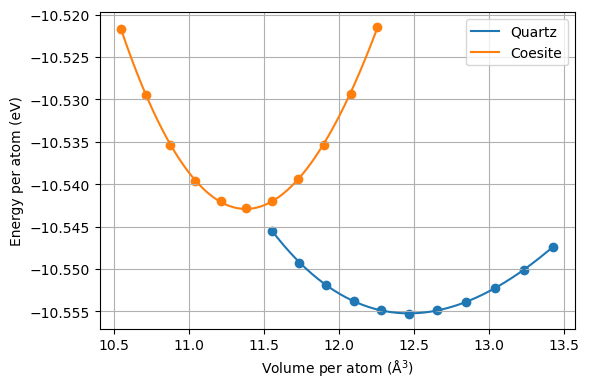

In [56]:
V_fit_c = np.linspace(min(V_c), max(V_c), 200)
V_fit_q = np.linspace(min(V_q), max(V_q), 200)


E_fit_c = birch_murnaghan(V_fit_c, *params_c)
E_fit_q = birch_murnaghan(V_fit_q, *params_q)


# Plot the data and fitted curves
plt.figure(figsize=(6, 4))
plt.plot(V_fit_q, E_fit_q, label='Quartz')
plt.plot(V_fit_c, E_fit_c, label='Coesite')
plt.scatter(V_q, E_q)
plt.scatter(V_c, E_c)
plt.xlabel(r'Volume per atom ($\mathrm{\AA}^3$)')
plt.ylabel('Energy per atom (eV)')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Exercise: Phase Stability Analysis Using the Birch-Murnaghan Equation of State

Determine the phase transition pressure between cristobalite and quartz by analyzing their enthalpy as a function of pressure using the third-order Birch-Murnaghan Equation of State (BM-EOS).


The Birch-Murnaghan equation of state is widely used in materials science to describe the pressure-volume-energy relationship of solids under compression. 

You are given the 3rd-order BM-EOS expression for pressure as a function of volume:

$$
P(V) = \frac{3B_0}{2} \left[ \left( \frac{V_0}{V} \right)^{7/3} - \left( \frac{V_0}{V} \right)^{5/3} \right] \cdot \left\{ 1 + \frac{3}{4}(B_0' - 4)\left[ \left( \frac{V_0}{V} \right)^{2/3} - 1 \right] \right\}
$$


You will use it to:

- Derive the energy–volume relation analytically.
- Compute the enthalpy for each phase.
- Identify the phase transition pressure by finding where the two enthalpy curves intersect.


For each phase, the following BM-EOS parameters are provided:

#### Cristobalite
- Equilibrium energy per atom: $E_0 = -10.546927$ eV/atom  
- Equilibrium volume per atom: $V_0 = 14.078548 \, \mathrm{\AA}^3/\text{atom}$  
- Bulk modulus: $B_0 = 15.48 \, \mathrm{GPa}$  
- Pressure derivative of the bulk modulus: $B_0' = 4.122$

#### Quartz
- Equilibrium energy per atom: $E_0 = -10.555232$ eV/atom  
- Equilibrium volume per atom: $V_0 = 12.464278 \, \mathrm{\AA}^3/\text{atom}$  
- Bulk modulus: $B_0 = 39.75 \, \mathrm{GPa}$  
- Pressure derivative of the bulk modulus: $B_0' = 5.339$



#### Units Matter:
- The bulk modulus $B_0$ is given in GPa, but the equation internally assumes energy per unit volume.
- You must convert $B_0$ from GPa to eV/Å$^3$ using:
  $$
  1 \, \mathrm{eV}/\mathrm{\AA}^3 = 160.21766208 \, \mathrm{GPa}
  $$
  Hence, to use the equation correctly:
  $$
  B_0\, [\mathrm{eV/\AA^3}] = \frac{B_0\, [\mathrm{GPa}]}{160.21766208}
  $$


a. **Derive $E(V)$ Analytically**  
   - Integrate the given expression for $P(V)$ with respect to $V$.
   - Use the provided $E_0$ values to fix the constant of integration.

b. **Compute $H(V,P)$**  
   - For each phase, calculate enthalpy:
     $$
     H(V) = E(V) + P(V)\cdot V
     $$

c. **Plot Enthalpy vs. Pressure**  
   - Plot both enthalpy curves $H(P)$ on the same graph.
   - Be mindful about the pressure units.

d. **Determine the Transition Pressure**  
   - Find the pressure where the enthalpies of the two phases intersect.
   - This is the phase transition pressure where the two phases are in equilibrium.

# Solution

## a. Derive $E(V)$ Analytically from the BM-EOS

From thermodynamics, pressure is related to energy by:

$$
P(V) = -\frac{dE}{dV}
$$

Therefore, to find $E(V)$, we integrate:

$$
E(V) = E_0 + \int_{V_0}^{V} -P(V') \, dV'
$$

Where $E_0$ is the energy at equilibrium volume $V_0$.


To perform the integration, we introduce the Eulerian strain $f$:

$$
f = \frac{1}{2} \left[ \left( \frac{V_0}{V} \right)^{2/3} - 1 \right]
$$

Expressing pressure in terms of $f$:

$$
P(f) = 3B_0 f (1 + 2f)^{5/2} \left[ 1 + \frac{3}{2}(B_0' - 4)f \right]
$$

Integrating $P(V)$ with respect to $V$ leads to the energy expression:

$$
E(V) = E_0 + \frac{9V_0B_0}{16} \left\{ \left[ \left( \frac{V_0}{V} \right)^{2/3} - 1 \right]^3 B_0' + \left[ \left( \frac{V_0}{V} \right)^{2/3} - 1 \right]^2 \left[ 6 - 4 \left( \frac{V_0}{V} \right)^{2/3} \right] \right\}
$$

This is the analytical expression for energy as a function of volume in the third-order BM-EOS.

### Alternative solution: using Python's SymPy library for symbolic mathematics

In [57]:
# Initialize pretty printing
sp.init_printing()

# Define symbols
V, V0, B0, B0p, E0 = sp.symbols('V V0 B0 B0p E0', positive=True)

# Define x using Rational to preserve the fraction
x = (V0 / V) ** Rational(1, 3)

# Define pressure P(V) with Rational constants
P = (Rational(3, 2) * B0) * (x**7 - x**5) * (1 + Rational(3, 4) * (B0p - 4) * (x**2 - 1))

# Compute energy E(V) by integrating -P with respect to V
E = E0 + sp.integrate(-P, V)

# Display the expression using LaTeX
display(Math(sp.latex(E)))

# Simplify the expression
E_simplified = simplify(E)

# Display the expression using LaTeX
display(Math(sp.latex(E_simplified)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [58]:
# Step 1: Define the BM-EOS energy function
def birch_murnaghan_energy(V, E0, B0, B0p, V0):
    """
    Calculate energy E(V) using the third-order Birch-Murnaghan equation of state.

    Variable:
    V   : Volume
    Parameters:
    E0  : Equilibrium energy
    B0  : Bulk modulus
    B0p : Pressure derivative of the bulk modulus
    V0  : Equilibrium volume

    Returns:
    E   : Energy corresponding to volume V
    """
    
    # Compute eta and delta
    eta = (V0 / V) ** (2.0 / 3.0)
    delta = eta - 1.0

    # Compute energy using the BM-EOS formula
    E = E0 + (9.0 * V0 * B0 / 16.0) * (delta**3 * B0p + delta**2 * (6.0 - 4.0 * eta))
    
    return E

# Step 2: Define system-specific parameters

# Parameters for coesite 
E0_c = -10.542918                # Equilibrium energy in eV/atom
V0_c = 11.376192                 # Equilibrium volume in Å³/atom
B0_c = 106.75 / 160.21766208      # Bulk modulus in eV/Å³
B0p_c = 1.059                    # Pressure derivative of the bulk modulus

# Parameters for quartz 
E0_q = -10.555232                # Equilibrium energy in eV/atom
V0_q = 12.464278                 # Equilibrium volume in Å³/atom
B0_q = 39.75 / 160.21766208      # Bulk modulus in eV/Å³
B0p_q = 5.339                    # Pressure derivative of the bulk modulus

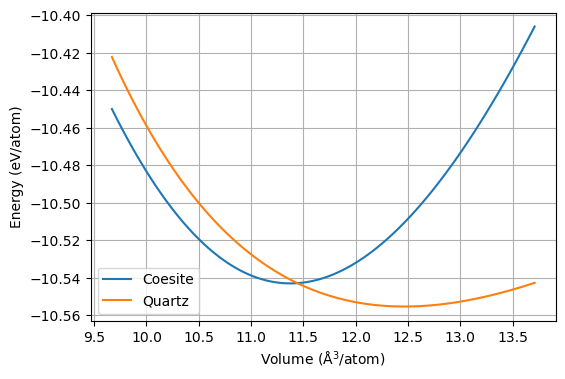

In [59]:
# Step 3: Compute and plot energy vs. volume
# Define a range of volumes around the equilibrium volume
V_range = np.linspace(0.85 * min(V0_c, V0_q), 1.1 * max(V0_c, V0_q), 100)

# Calculate energies for each phase
E_c = birch_murnaghan_energy(V_range, E0_c, B0_c, B0p_c, V0_c)
E_q = birch_murnaghan_energy(V_range, E0_q, B0_q, B0p_q, V0_q)

# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(V_range, E_c, label='Coesite')
plt.plot(V_range, E_q, label='Quartz')
plt.xlabel('Volume ($\mathrm{\AA}^3$/atom)')
plt.ylabel('Energy (eV/atom)')

plt.legend()
plt.grid(True)

## b. Compute H

- Define the Pressure Function $P(V)$:
   - Complete the function `birch_murnaghan_pressure` by filling in the missing parts.

- Compute Enthalpy $H(V)$:
     $$
     H(V) = E(V) + P(V)\cdot V
     $$
   where $E(V)$ is `birch_murnaghan_energy` and $P(V)$ is `birch_murnaghan_pressure`.

- Plot Enthalpy vs. Volume:
   - Generate plots of enthalpy $H$ as a function of volume $V$ for both phases.

In [60]:
# Step 1: Define the BM-EOS pressure function
def birch_murnaghan_pressure(V, B0, B0p, V0):
    """
    Calculate pressure P(V) using the third-order Birch-Murnaghan equation of state.

    Parameters:
    V   : Volume (array-like)
    B0  : Bulk modulus
    B0p : Pressure derivative of the bulk modulus
    V0  : Equilibrium volume

    Returns:
    P   : Pressure corresponding to volume V
    """
    V = np.array(V)
    eta = (V0 / V) ** (1.0 / 3.0)
    P = (3.0 * B0 / 2.0) * (eta**7 - eta**5) * (1.0 + (3.0 / 4.0) * (B0p - 4.0) * (eta**2 - 1.0))
    return P

In [61]:
# Define a range of volumes around the equilibrium volume
V_range = np.linspace(0.9 * min(V0_c, V0_q), 1.05 * max(V0_c, V0_q), 100)

# Calculate pressures and enthalpies for cristobalite
P_c = birch_murnaghan_pressure(V_range, B0_c, B0p_c, V0_c)
E_c = birch_murnaghan_energy(V_range, E0_c, B0_c, B0p_c, V0_c)
H_c = E_c + P_c * V_range 

# Calculate pressures and enthalpies for quartz
P_q = birch_murnaghan_pressure(V_range, B0_q, B0p_q, V0_q)
E_q = birch_murnaghan_energy(V_range, E0_q, B0_q, B0p_q, V0_q)
H_q = E_q + P_q * V_range   

## c. Plot H as a function of p

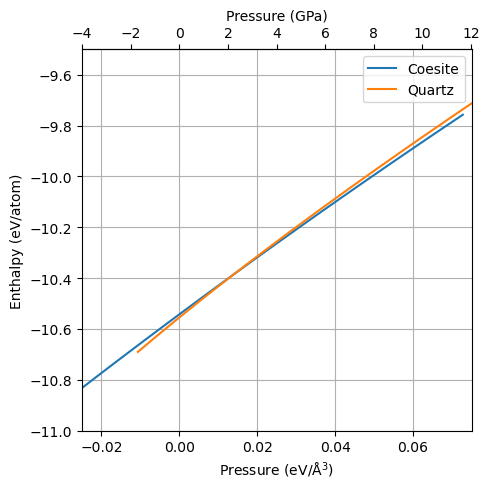

In [62]:
# conversion factor
eVA3_to_GPa = 160.21766208

# make the plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(P_c, H_c, label='Coesite')
ax.plot(P_q, H_q, label='Quartz')
ax.set_xlabel(r'Pressure (eV/$\mathrm{\AA}^3$)')
ax.set_ylabel('Enthalpy (eV/atom)')
ax.set_xlim(-0.025, 0.075)
ax.set_ylim(-11, -9.5)
ax.grid(True)
ax.legend()

# add a secondary x-axis on top in GPa
def to_GPa(x):
    return x * eVA3_to_GPa
def to_eVA3(x):
    return x / eVA3_to_GPa

secax = ax.secondary_xaxis('top', functions=(to_GPa, to_eVA3))
secax.set_xlabel('Pressure (GPa)')

plt.tight_layout()
plt.show()

## d. Determine the phase transition pressure

In [63]:
# Define a range of volumes around the equilibrium volume
V_range = np.linspace(0.9 * min(V0_c, V0_q), 1.05 * max(V0_c, V0_q), 100)

# Interpolate enthalpy as a function of pressure
H_c_interp = interp1d(P_c, H_c, kind='cubic', bounds_error=False, fill_value='extrapolate')
H_q_interp = interp1d(P_q, H_q, kind='cubic', bounds_error=False, fill_value='extrapolate')

# Define a function for the difference in enthalpy
def delta_H(P):
    return H_c_interp(P) - H_q_interp(P)

# Find the pressure where delta_H crosses zero
P_min = max(min(P_c), min(P_q))
P_max = min(max(P_c), max(P_q))

try:
    P_transition = brentq(delta_H, P_min, P_max)
    print(f"Transition pressure: {P_transition*160.21766208:.3f} GPa")
except ValueError:
    print("No intersection found in the specified pressure range.")

Transition pressure: 2.211 GPa


In [64]:
# Define a pressure range for evaluating delta_H
P_vals = np.linspace(P_min, P_max, 500)  # pressure in eV/Å³
delta_H_vals = delta_H(P_vals)           # corresponding ΔH values

# Convert pressure to GPa for readability
P_vals_GPa = P_vals * eVA3_to_GPa

# Build the DataFrame
df = pd.DataFrame({
    'Pressure (eV/Å³)': P_vals,
    'Pressure (GPa)': P_vals_GPa,
    'delta_H (eV/atom)': delta_H_vals
})

#df.query('`delta_H (eV/atom)` > -0.001 and `delta_H (eV/atom)` < 0.001')

# Use np.isclose to find near-zero ΔH rows
df[np.isclose(df['delta_H (eV/atom)'], 0, atol=1e-4)]

,Pressure (eV/Å³),Pressure (GPa),delta_H (eV/atom)
146,0.013774,2.206838,0.000018


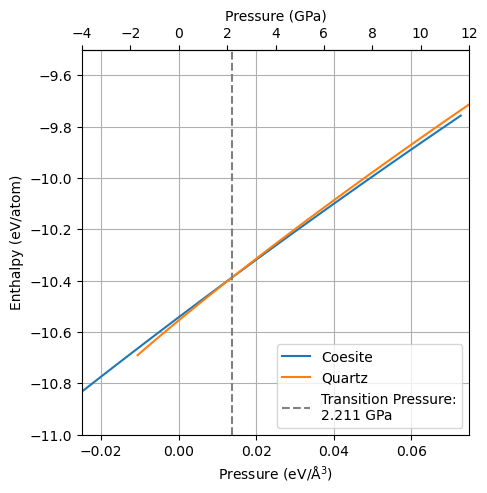

In [65]:
# conversion factor
eVA3_to_GPa = 160.21766208

# make the plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(P_c, H_c, label='Coesite')
ax.plot(P_q, H_q, label='Quartz')
ax.axvline(P_transition, color='gray', linestyle='--', label=f'Transition Pressure:\n{P_transition*160.21766208:.3f} GPa')
ax.set_xlabel(r'Pressure (eV/$\mathrm{\AA}^3$)')
ax.set_ylabel('Enthalpy (eV/atom)')
ax.set_xlim(-0.025, 0.075)
ax.set_ylim(-11, -9.5)
ax.grid(True)
ax.legend()

# add a secondary x-axis on top in GPa
def to_GPa(x):
    return x * eVA3_to_GPa
def to_eVA3(x):
    return x / eVA3_to_GPa

secax = ax.secondary_xaxis('top', functions=(to_GPa, to_eVA3))
secax.set_xlabel('Pressure (GPa)')

plt.legend()
plt.grid(True)
plt.show()

> Does it check out with what we know about the system?

<div style="text-align: center;">
    <img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41467-024-45840-9/MediaObjects/41467_2024_45840_Fig2_HTML.png?as=webp" width=500 align=left>
</div>

## Do we get the same result with the common tangent construction?

To find the common‐tangent construction between two Birch–Murnaghan energy–volume curves $E_1(V)$ and $E_2(V)$, one needs to locate two volumes $V_1$ and $V_2$ (one on each curve) such that:

1. The slopes (pressures) are equal:
   $$
     P_1(V_1) = -\frac{\mathrm{d}E_1}{\mathrm{d}V}\Big|_{V_1}
     \;=\;
     P_2(V_2) = -\frac{\mathrm{d}E_2}{\mathrm{d}V}\Big|_{V_2}
   $$

2. The two tangent lines coincide (i.e., they have the same intercept):
   $$
     E_1(V_1) - P\,V_1 \;=\; E_2(V_2) - P\,V_2.
   $$

Once you have $V_1$, $V_2$ and the common slope (pressure) $P$, the tangent line is
$$
  E_{\rm tang}(V) \;=\; P\,V + c,
  \quad
  c = E_1(V_1) - P\,V_1.
$$



Define for each phase $i=1,2$:
- $E_i(V)$ and $P_i(V)$ as above.
- Unknowns $x = (V_1, V_2)$.

Then solve the system
$$
\begin{cases}
f_1(V_1,V_2) \;=\; P_1(V_1) - P_2(V_2) \;=\; 0,\\
f_2(V_1,V_2) \;=\; \bigl[E_1(V_1)-P_1(V_1)V_1\bigr]
              -\bigl[E_2(V_2)-P_2(V_2)V_2\bigr]
              \;=\; 0.
\end{cases}
$$

Once $(V_1,V_2)$ are found, the common pressure is 
$$
P = P_1(V_1) = P_2(V_2),
$$
and the intercept 
$$
c = E_1(V_1) - P\,V_1.
$$

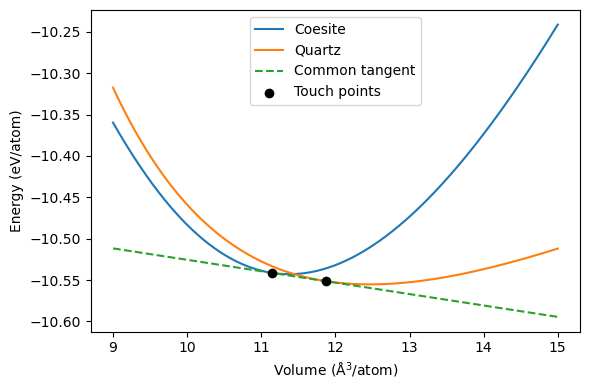

V₁ = 11.1454  Å³
V₂ = 11.8704  Å³
P  = 0.013798  eV/Å³  =  2.211  GPa


In [70]:
# ---------------- Symbols and Parameters -----------------
V1, V2 = sp.symbols('V1 V2', positive=True)
E0_c, V0_c, B0_c, B0p_c = sp.symbols('E0_c V0_c B0_c B0p_c')
E0_q, V0_q, B0_q, B0p_q = sp.symbols('E0_q V0_q B0_q B0p_q')

# ---------------- Symbolic Birch–Murnaghan -----------------
def E_BM_sym(V, E0, V0, B0, B0p):
    eta = (V0 / V)**(sp.Rational(2, 3)) - 1
    return E0 + 9 * V0 * B0 / 16 * (B0p * eta**3 + (6 - 4 * (1 + eta)) * eta**2)

E_c = E_BM_sym(V1, E0_c, V0_c, B0_c, B0p_c)
E_q = E_BM_sym(V2, E0_q, V0_q, B0_q, B0p_q)
P_c = -sp.diff(E_c, V1)
P_q = -sp.diff(E_q, V2)

# Common tangent conditions
eq1 = sp.Eq(P_c, P_q)
eq2 = sp.Eq(E_c + P_c * V1, E_q + P_q * V2)

# ---------------- Parameters -----------------
E0_c_val, V0_c_val, B0_c_val, B0p_c_val = -10.542918, 11.376192, 106.75 / 160.21766208, 1.059
E0_q_val, V0_q_val, B0_q_val, B0p_q_val = -10.555232, 12.464278, 39.75 / 160.21766208, 5.339

subs = {
    E0_c: E0_c_val, V0_c: V0_c_val, B0_c: B0_c_val, B0p_c: B0p_c_val,
    E0_q: E0_q_val, V0_q: V0_q_val, B0_q: B0_q_val, B0p_q: B0p_q_val
}

# ---------------- Solve -----------------
V1_star, V2_star = sp.nsolve((eq1.subs(subs), eq2.subs(subs)), (V1, V2), (11, 12))
P_star = float(P_c.subs({**subs, V1: V1_star}))
slope = -P_star

# Compute intercept from coesite point
c_star = birch_murnaghan_energy(float(V1_star), E0_c_val, B0_c_val, B0p_c_val, V0_c_val) + P_star * float(V1_star)

# ---------------- Plot -----------------
V_range = np.linspace(9, 15, 400)
E_c_vals = birch_murnaghan_energy(V_range, E0_c_val, B0_c_val, B0p_c_val, V0_c_val)
E_q_vals = birch_murnaghan_energy(V_range, E0_q_val, B0_q_val, B0p_q_val, V0_q_val)
tangent  = -P_star * V_range + c_star

plt.figure(figsize=(6, 4))
plt.plot(V_range, E_c_vals, label='Coesite')
plt.plot(V_range, E_q_vals, label='Quartz')
plt.plot(V_range, tangent, '--', label='Common tangent')
plt.scatter([float(V1_star), float(V2_star)],
            [birch_murnaghan_energy(float(V1_star), E0_c_val, B0_c_val, B0p_c_val, V0_c_val),
             birch_murnaghan_energy(float(V2_star), E0_q_val, B0_q_val, B0p_q_val, V0_q_val)],
            color='black', zorder=5, label='Touch points')
plt.xlabel('Volume ($\mathrm{\AA}^3$/atom)')
plt.ylabel('Energy (eV/atom)')
plt.legend()
plt.tight_layout()
plt.show()

# ---------------- Output -----------------
print(f"V₁ = {float(V1_star):.4f}  Å³")
print(f"V₂ = {float(V2_star):.4f}  Å³")
print(f"P  = {P_star:.6f}  eV/Å³  =  {P_star * 160.2177:.3f}  GPa")